In [45]:
from sklearn.datasets import fetch_openml
import numpy as np

In [46]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [47]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [48]:
X, y = mnist["data"], mnist["target"]

In [49]:
X.shape

(70000, 784)

In [50]:
type(X)

numpy.ndarray

In [51]:
some_digit = X[0]

In [52]:
y.shape
type(X)

numpy.ndarray

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

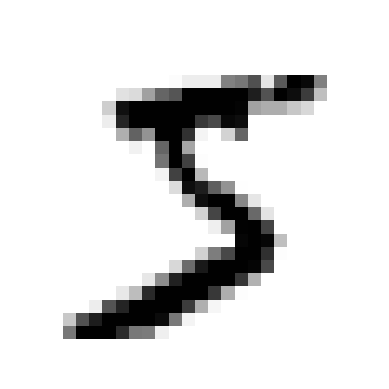

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
y[0]

'5'

In [56]:
import numpy as np
y = y.astype(np.uint8)

In [57]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [58]:
from sklearn.linear_model import SGDClassifier

In [59]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [60]:
sg = SGDClassifier(random_state=42)

In [61]:
sg.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [62]:
sg.predict([some_digit])

array([ True])

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cross_val_score(sg, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [65]:
from sklearn.model_selection import cross_val_predict

In [66]:
y_train_pred = cross_val_predict(sg, X_train, y_train_5, cv=3)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [69]:
from sklearn.metrics import f1_score

In [70]:
y_scores = sg.decision_function([some_digit])
print(y_scores)

[2164.22030239]


In [71]:
print(some_digit.shape)  # Verifica as dimensões


(784,)


In [72]:
f1_score(y_train_5, y_train_pred)

np.float64(0.7325171197343847)

In [73]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(sg, X_train, y_train_5, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal de referência (random guess)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("Curva ROC")
    plt.legend(loc="best")

C:\Users\guiso\AppData\Local\Temp\ipykernel_2832\554996995.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


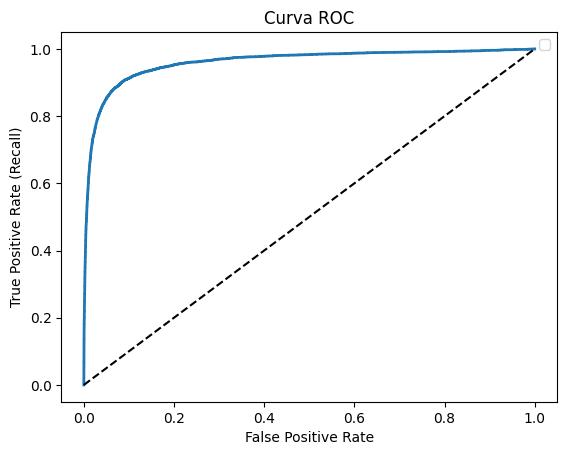

In [75]:
plot_roc_curve(fpr, tpr)
plt.show()

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
forest = RandomForestClassifier(random_state=42)

In [78]:
y_probas = cross_val_predict(forest, X_train, y_train_5, cv=3, method="predict_proba")

In [79]:
y_scores_forest = y_probas[:, 1]

In [80]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

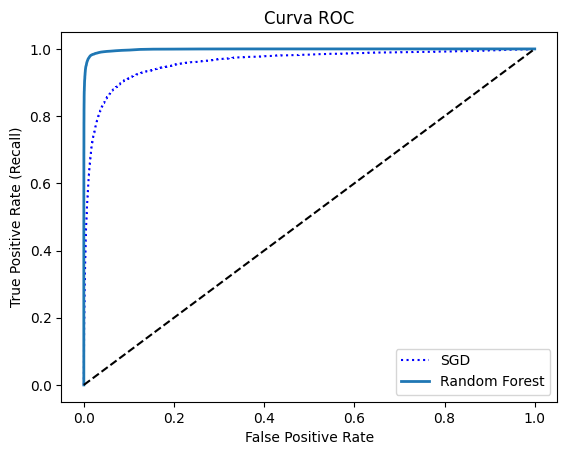

In [81]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

In [84]:
from sklearn.svm import SVC

In [85]:
svm = SVC()

In [86]:
svm.fit(X_train, y_train)

SVC()

In [87]:
svm.predict([some_digit])

array([5], dtype=uint8)

In [88]:
some_digit_score = svm.decision_function([some_digit])
some_digit_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [89]:
np.argmax(some_digit_score)

np.int64(5)

In [90]:
sg_multiclass = SGDClassifier(random_state=42)

In [91]:
sg_multiclass.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [92]:
sg_multiclass.predict([some_digit])

array([3], dtype=uint8)

In [93]:
sg_multiclass.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [94]:
cross_val_score(sg_multiclass, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [98]:
cross_val_score(sg_multiclass, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [99]:
y_train_pred = cross_val_predict(sg_multiclass, X_train_scaled, y_train, cv=3)

In [100]:
mx = confusion_matrix(y_train, y_train_pred)
mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

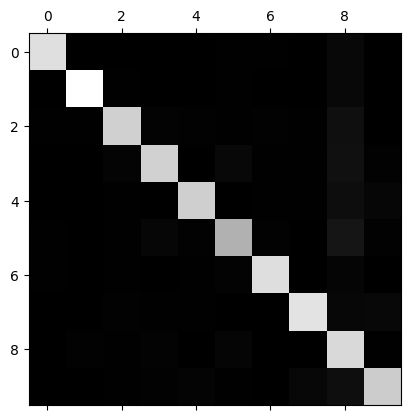

In [101]:
plt.matshow(mx, cmap=plt.cm.gray)
plt.show()

In [102]:
row_sums = mx.sum(axis=1, keepdims=True)

In [103]:
norm_mx = mx / row_sums

In [104]:
np.fill_diagonal(norm_mx, 0)

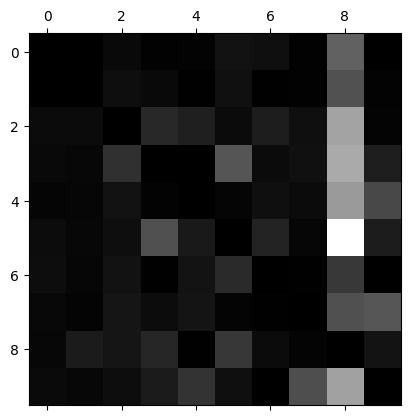

In [105]:
plt.matshow(norm_mx, cmap=plt.cm.gray)
plt.show()

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
y_train_large = (y_train >= 7)

In [108]:
y_train_odd = (y_train % 2 == 1)

In [109]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [110]:
knn = KNeighborsClassifier()

In [111]:
knn.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [112]:
knn.predict([some_digit])

array([[False,  True]])

In [113]:
y_train_knn_pred = cross_val_predict(knn, X_train, y_multilabel, cv=3)

In [114]:
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [115]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

np.float64(0.9778357403921755)

In [116]:
from random import randint
noise = np.random.randint(0,100, (len(X_train), 784))

In [117]:
X_train_mod = X_train + noise

In [118]:
noise = np.random.randint(0, 100, (len(X_test), 784))

In [119]:
X_test_mod = X_test + noise

In [120]:
y_train_mod = X_train

In [121]:
y_test_mod = X_test

In [122]:
knn.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [123]:
some_index = 0
clean_digit = knn.predict([X_test_mod[some_index]])

In [124]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

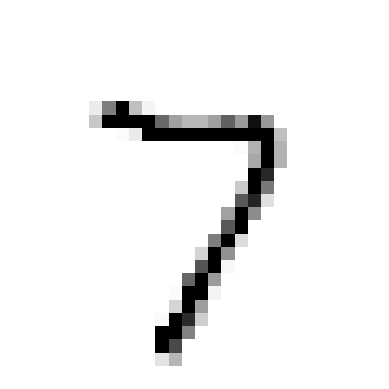

In [125]:
plot_digit(clean_digit)

In [126]:
knn2 = KNeighborsClassifier()

In [127]:
cross_val_score(knn2, X_train, y_train, cv=3)

array([0.9676 , 0.9671 , 0.96755])

In [128]:
from sklearn.model_selection import GridSearchCV

In [148]:
params = [
    {"n_neighbors" : list(range(1,7,5)),
     "weights": ["uniform", "distance"],
    }
]

In [130]:
grid_search = GridSearchCV(knn2, params, verbose=3)

In [131]:
print(type(X_train), type(y_train)) 

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [132]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.970 total time=  11.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.971 total time=  11.1s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.969 total time=  11.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.969 total time=  10.7s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.968 total time=  10.9s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.970 total time=  11.6s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.971 total time=  10.3s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.969 total time=  10.4s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.969 total time=  10.6s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.968 total time=  10.3s
[CV 1/5] END ....n_neighbors=6, weights=uniform;, score=0.968 total time=  10.9s
[CV 2/5] END ....n_neighbors=6, weights=uniform;

C:\Users\guiso\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 6, 11, 16, 21, 26],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [133]:
grid_search.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [134]:
grid_search.best_score_

np.float64(0.9712333333333334)

In [135]:
from scipy.ndimage import shift


In [150]:
knn3 = KNeighborsClassifier(**grid_search.best_params_)

In [151]:
from sklearn.model_selection import cross_val_score

In [152]:
cross_val_score(knn3, X_shifted, y_train, cv=3)

array([0.71125, 0.70105, 0.70745])

In [162]:
def shifted_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dx, dy], cval=0, mode="constant")
    return image.reshape([-1])

In [166]:
X_train_argumented = [image for image in X_train]
y_train_argumented = [label for label in y_train]

In [167]:
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_argumented.append(shifted_image(image, dx, dy))
        y_train_argumented.append(label)

In [168]:
X_train_argumented = np.array(X_train_argumented)
y_train_argumented = np.array(y_train_argumented)

In [170]:
shuffle_idx = np.random.permutation(len(X_train_argumented))

In [171]:
X_train_argumented = X_train_argumented[shuffle_idx]
y_train_argumented = y_train_argumented[shuffle_idx]

In [172]:
knn3.fit(X_train_argumented, y_train_argumented)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [173]:
y_pred = knn3.predict(X_test)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9691